In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from common import fetch_data, get_backtest_result, get_hodl_result, max_drawdown, get_cache_path, save_cache_data, load_cache_data

In [30]:
# Input
exchanges_markets = [
    {
        "binance": "BTCUSDT",
        "bitmex": "XBTUSD",
        "apollox": "BTCUSDT",
        "drift": "BTC-PERP"
    },
    {
        "binance": "SOLUSDT",
        "bitmex": "SOLUSD",
        "apollox": "SOLUSDT",
        "drift": "SOL-PERP"
    }
]

# Initial variables
min_time = datetime.fromisoformat('2023-06-01').timestamp()
max_time = datetime.fromisoformat('2023-12-31').timestamp()

data_df_map = {}
results = {}

leverage = 1

# Read data from file
# Read data from file
for exchanges_market in exchanges_markets:
    for exchange, market in exchanges_market.items():
        data_df = load_cache_data(exchange, market)
        
        if exchange not in data_df_map:
            data_df_map[exchange] = {}
        data_df_map[exchange][market] = data_df

# calculate min max time
for exchanges_market in exchanges_markets:
    for exchange, market in exchanges_market.items():
        data_df = data_df_map[exchange][market]
        min_time = max(min_time, data_df["timestamp"].min())
        max_time = min(max_time, data_df["timestamp"].max())

# Calculate funding rate backtest result
for exchanges_market in exchanges_markets:
    for exchange, market in exchanges_market.items():
        data_df = data_df_map[exchange][market]
        data_df['datetime'] = data_df['datetime'].apply(lambda x: pd.to_datetime(x))

        data_df = data_df[
            (data_df["timestamp"] >= min_time) & (data_df["timestamp"] <= max_time)
        ]

        data_df = data_df.sort_values(by='datetime', ascending=True)
        data_df = data_df.reset_index(drop=True)

        result_df = get_backtest_result(data_df, leverage)
        
        if exchange not in results:
            results[exchange] = {}
            
        results[exchange][market] = result_df

# Results are store in 'results' and 'hodl_df' variables

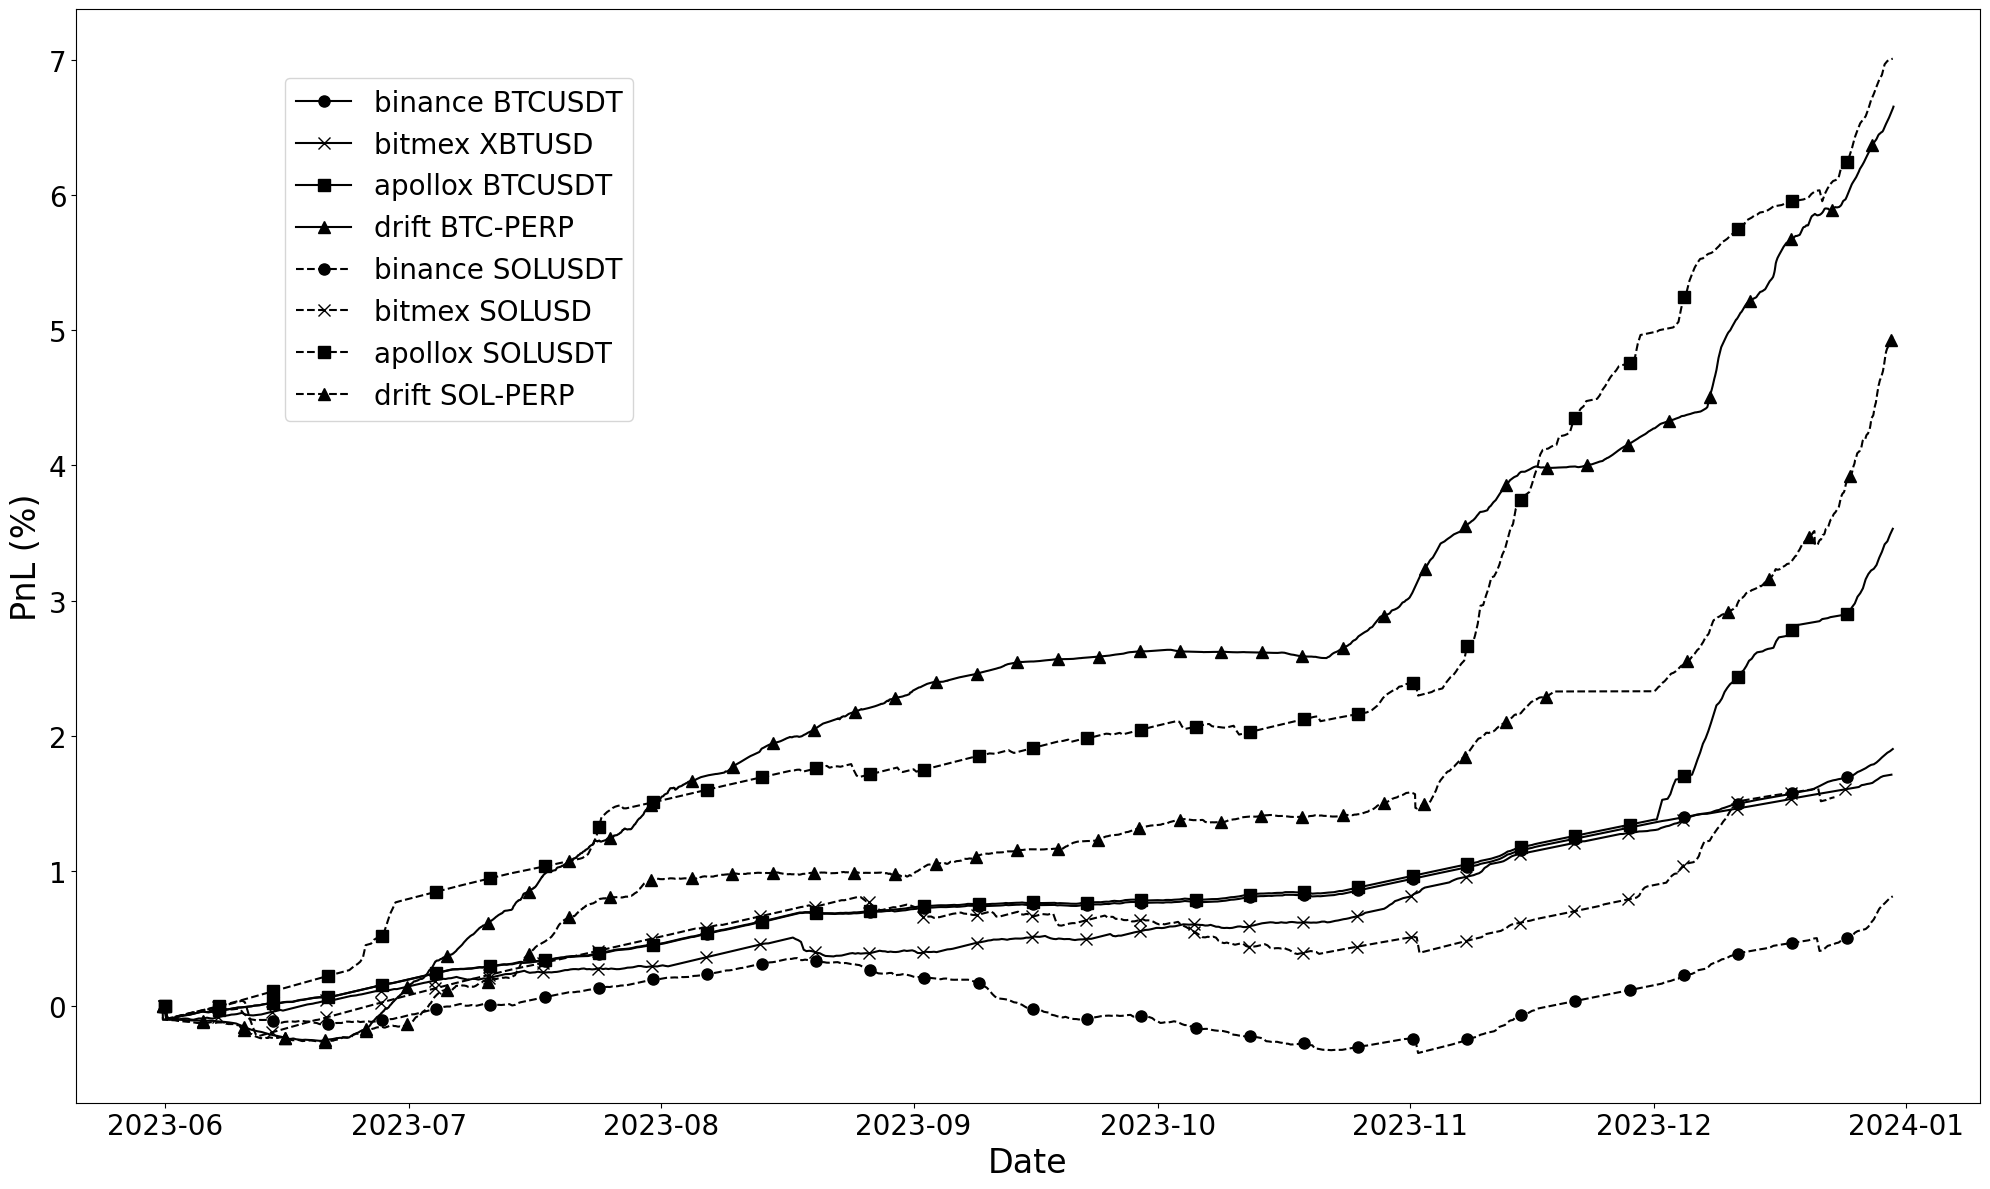

In [32]:
# Plot funding rate arb PNL only

line_styles = {
    "BTCUSDT": "-",
    "XBTUSD": "-",
    "BTCUSDT": "-",
    "BTC-PERP": "-",
    "SOLUSDT": "--",
    "SOLUSD": "--",
    "SOLUSDT": "--",
    "SOL-PERP": "--"
}

markers = {"binance": "o", "apollox": "s", "bitmex": "x", "drift": "^"}
mark_every = {"binance": 20, "bitmex": 20, "apollox": 20, "drift": 120}

fig, ax = plt.subplots(figsize=(20, 12))

# Plot funding arb result
for exchanges_market in exchanges_markets:
    for exchange, market in exchanges_market.items():
        result_df = results[exchange][market]
        line,  = ax.plot(
            result_df["datetime"],
            result_df["final_pnl"] * 100,
            label=f"{exchange} {market}",
            color="black",
            ms=8,
            marker=markers[exchange],
            markevery=mark_every[exchange],
            linestyle=line_styles[market],
        )
        
# Chart settings
lines, labels = ax.get_legend_handles_labels()
plt.xlabel("Date", fontsize=24)
plt.ylabel("PnL (%)", fontsize=24)
ax.legend(lines, labels, loc="upper right", bbox_to_anchor=(0.3, 0.95), fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Ensure a tight layout to avoid label/legend clipping
plt.tight_layout()

plt.savefig('./images/pnl_analysis.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Compute data on the result

# min PNL

# max PNL

# max drawdown

# average PNL